Analisis Hotel Booking \
(Ni Kadek Emik Sapitri)

## Load data & data cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_hotel = pd.read_csv('hotel_bookings.csv')
data_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data_hotel.isnull().values.any()

True

In [8]:
data_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#coba cek nilai unik pada kolom yang ada NaN-nya

print(f"Nilai unik kolom 'country': {data_hotel['country'].unique()}")
print(f"\nNilai unik kolom 'agent': {data_hotel['agent'].unique()}")
print(f"\nNilai unik kolom 'company': {data_hotel['company'].unique()}")
print(f"\nNilai unik kolom 'children': {data_hotel['children'].unique()}")

Nilai unik kolom 'country': ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' '

In [10]:
print(f"Nilai unik kolom 'adults': {data_hotel['adults'].unique()}")
print(f"\nNilai unik kolom 'babies': {data_hotel['babies'].unique()}")

Nilai unik kolom 'adults': [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]

Nilai unik kolom 'babies': [ 0  1  2 10  9]


In [11]:
#fill NaN

data_hotel['country'].fillna('Undefined', inplace=True)
data_hotel['agent'].fillna(0, inplace=True)
data_hotel['company'].fillna(0, inplace=True)
data_hotel['children'].fillna(0, inplace=True)

data_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [12]:
data_hotel.duplicated().sum()

31994

Karena tidak ada booking ID maka memang mungkin ada duplicate, tidak perlu dihapus.

In [13]:
# kalau ada booking, secara logika kolom adults, children, babies tidak mungkin 0 bersamaan

filter_logic = (data_hotel['adults']==0) & (data_hotel['children']==0) & (data_hotel['babies']==0)
data_hotel[filter_logic]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [14]:
#ternyata ada 180 baris data kotor
#pakai hanya data bersih dengan buat negasi

data_hotel_clean = data_hotel[~filter_logic]
data_hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [15]:
data_hotel_clean.shape

(119210, 32)

## Analisa 1: Dari negara mana datangnya tamu?

In [16]:
# cek kolom hotel

data_hotel_clean['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:
# pisahkan data 'Resort Hotel' dengan 'City Hotel' agar visualisasi lebih akurat
# pastikan bookingnya yang jadi (tidak cancel)

filter_resort = data_hotel_clean[(data_hotel_clean['hotel']=='Resort Hotel') & (data_hotel_clean['is_canceled'] == 0)]
filter_city = data_hotel_clean[(data_hotel_clean['hotel']=='City Hotel') & (data_hotel_clean['is_canceled'] == 0)]

In [18]:
filter_resort.shape

(28927, 32)

In [19]:
filter_city.shape

(46084, 32)

In [20]:
print('Negara asal pengunjung resort hotel:', filter_resort.groupby('country')['country'].count())

Negara asal pengunjung resort hotel: country
AGO    17
ALB     2
AND     2
ARE     3
ARG    48
       ..
VEN     2
VNM     2
ZAF    13
ZMB     1
ZWE     2
Name: country, Length: 119, dtype: int64


In [21]:
print('Negara asal pengunjung city hotel:', filter_city.groupby('country')['country'].count())

Negara asal pengunjung city hotel: country
ABW            2
AGO          140
AIA            1
ALB            8
ARE            5
            ... 
UZB            1
Undefined      2
VEN           12
VNM            4
ZAF           36
Name: country, Length: 151, dtype: int64


In [22]:
# bikin biar terurut dari terbesar ke terkecil

filter_resort_resume = filter_resort['country'].value_counts().reset_index()
filter_resort_resume.columns=['country', 'total guest']
filter_resort_resume

,country,total guest
0,PRT,10184
1,GBR,5922
2,ESP,3105
3,IRL,1734
4,FRA,1399
...,...,...
114,UGA,1
115,COM,1
116,MUS,1
117,BIH,1


In [23]:
filter_city_resume = filter_city['country'].value_counts().reset_index()
filter_city_resume.columns=['country', 'total guest']
filter_city_resume

,country,total guest
0,PRT,10793
1,FRA,7069
2,DEU,5010
3,GBR,3746
4,ESP,3278
...,...,...
146,UGA,1
147,PYF,1
148,JAM,1
149,SYC,1


In [24]:
#gabungan

filter_hotel = data_hotel_clean[data_hotel_clean['is_canceled'] == 0]
filter_hotel_resume = filter_hotel['country'].value_counts().reset_index()
filter_hotel_resume.columns=['country', 'total guest']
filter_hotel_resume

,country,total guest
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [25]:
import matplotlib.pyplot as plt

In [26]:
labels = filter_resort['country'].value_counts().index
values = filter_resort['country'].value_counts()

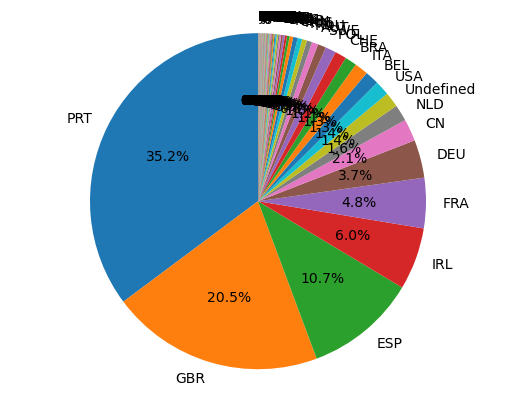

In [28]:
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal') 
plt.show()

In [32]:
import plotly.express as px
import plotly.graph_objs as go

map_gabungan = px.choropleth(filter_hotel_resume,
                             locations= filter_hotel_resume['country'],
                             color = filter_hotel_resume['total guest'],
                             hover_name = filter_hotel_resume['country'],
                             title = 'Home country of guests')
map_gabungan.show()
#hover_name itu ngaruh ke teks yang muncul pas arahin kursor ke situ

In [ ]:
map_resort = px.choropleth(filter_resort_resume,
                             locations= filter_resort_resume['country'],
                             color = filter_resort_resume['total guest'],
                             hover_name = filter_resort_resume['country'],
                             title = 'Home country of guests in resort hotel')
map_resort.show()

In [ ]:
map_city = px.choropleth(filter_city_resume,
                             locations= filter_city_resume['country'],
                             color = filter_city_resume['total guest'],
                             hover_name = filter_city_resume['country'],
                             title = 'Home country of guests in city hotel')
map_city.show()

## Analisa 2: Berapa yang tamu bayar untuk kamar per malam?

In [ ]:
filter_bayar = filter_hotel.groupby(['hotel', 'reserved_room_type'])['adr'].sum()

print('Pendapatan per room type:\n',filter_bayar)

Pendapatan per room type:
 hotel         reserved_room_type
City Hotel    A                     3411541.61
              B                       65198.48
              C                         613.00
              D                      975991.36
              E                      160340.39
              F                      201965.15
              G                       70919.54
Resort Hotel  A                     1255914.57
              B                         314.00
              C                       94871.86
              D                      548134.16
              E                      389433.08
              F                      119226.25
              G                      154335.55
              H                       64389.76
              L                         604.00
Name: adr, dtype: float64


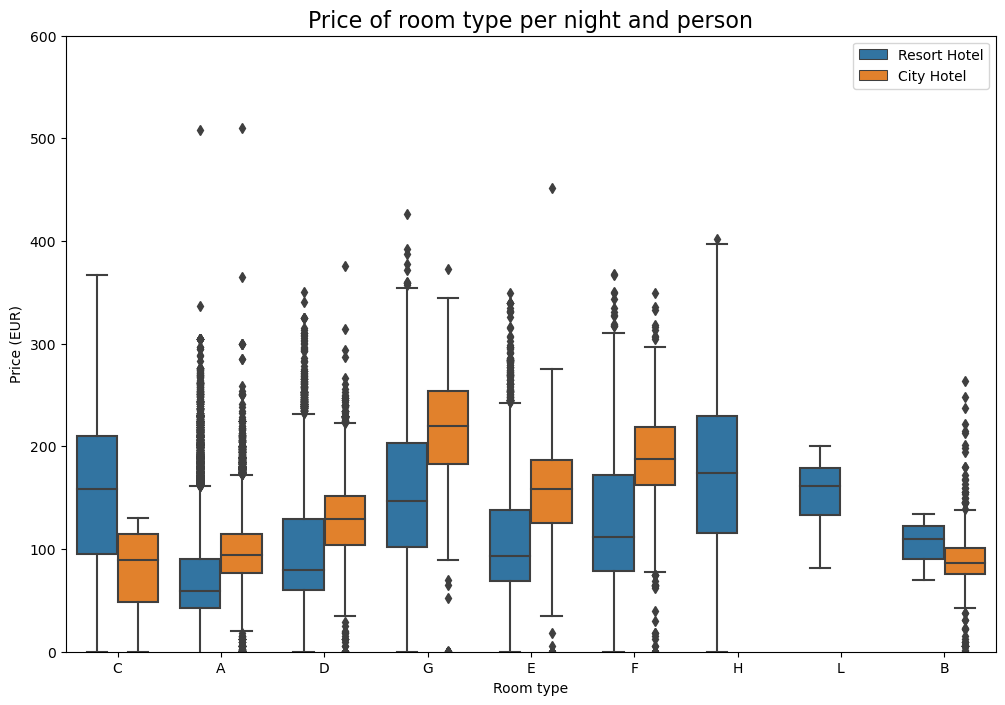

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'reserved_room_type',
            y = 'adr',
            hue = 'hotel',
            data = filter_hotel)
plt.title('Price of room type per night and person', fontsize = 16)
plt.xlabel('Room type')
plt.ylabel('Price (EUR)')
plt.legend(loc = 'upper right')
plt.ylim(0,600)
plt.show()

## Analisa 3: Variasi harga per kamar per malam sepanjang tahun

In [ ]:
filter_harga_resort = filter_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
filter_harga_resort

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
filter_harga_cityh = filter_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
filter_harga_cityh

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
gabungan_harga = filter_harga_resort.merge(filter_harga_cityh, 
                                           on = 'arrival_date_month')
gabungan_harga.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
gabungan_harga

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
!pip install sort-dataframeby-monthorweek

In [ ]:
!pip install sorted-months-weekdays

In [ ]:
import sort_dataframeby_monthorweek as sd 

In [ ]:
gabungan_harga_sorted = sd.Sort_Dataframeby_Month(df = gabungan_harga,
                                                  monthcolumnname='month')
gabungan_harga_sorted

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [ ]:
px.line(gabungan_harga_sorted, x = 'month',
        y = ['price_for_resort', 'price_for_city_hotel'],
        title = 'Room price per night over the months')

## Analisa 4: Distribusi jumlah hari tamu menginap berdasarkan market segment dan tipe hotel

In [ ]:
filter_hotel[['hotel', 'market_segment', 'stays_in_weekend_nights', 'stays_in_week_nights']]

,hotel,market_segment,stays_in_weekend_nights,stays_in_week_nights
0,Resort Hotel,Direct,0,0
1,Resort Hotel,Direct,0,0
2,Resort Hotel,Direct,0,1
3,Resort Hotel,Corporate,0,1
4,Resort Hotel,Online TA,0,2
...,...,...,...,...
119385,City Hotel,Offline TA/TO,2,5
119386,City Hotel,Online TA,2,5
119387,City Hotel,Online TA,2,5
119388,City Hotel,Online TA,2,5


<Axes: xlabel='market_segment', ylabel='stays_in_week_nights'>

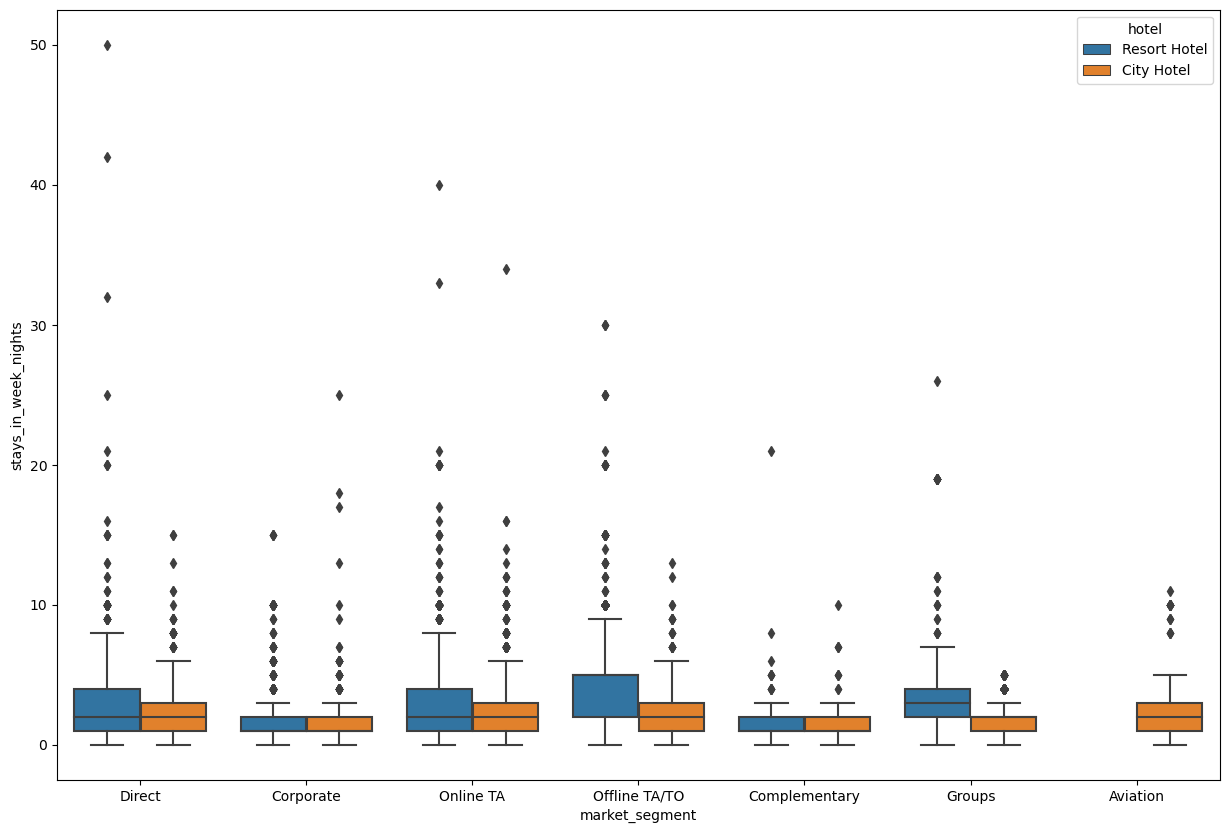

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'market_segment', y = 'stays_in_week_nights', 
            hue = 'hotel', data = filter_hotel)

## Analisa 5: Rata-rata harga per malam berdasarkan tipe kamar dan market segment

<Axes: xlabel='market_segment', ylabel='adr'>

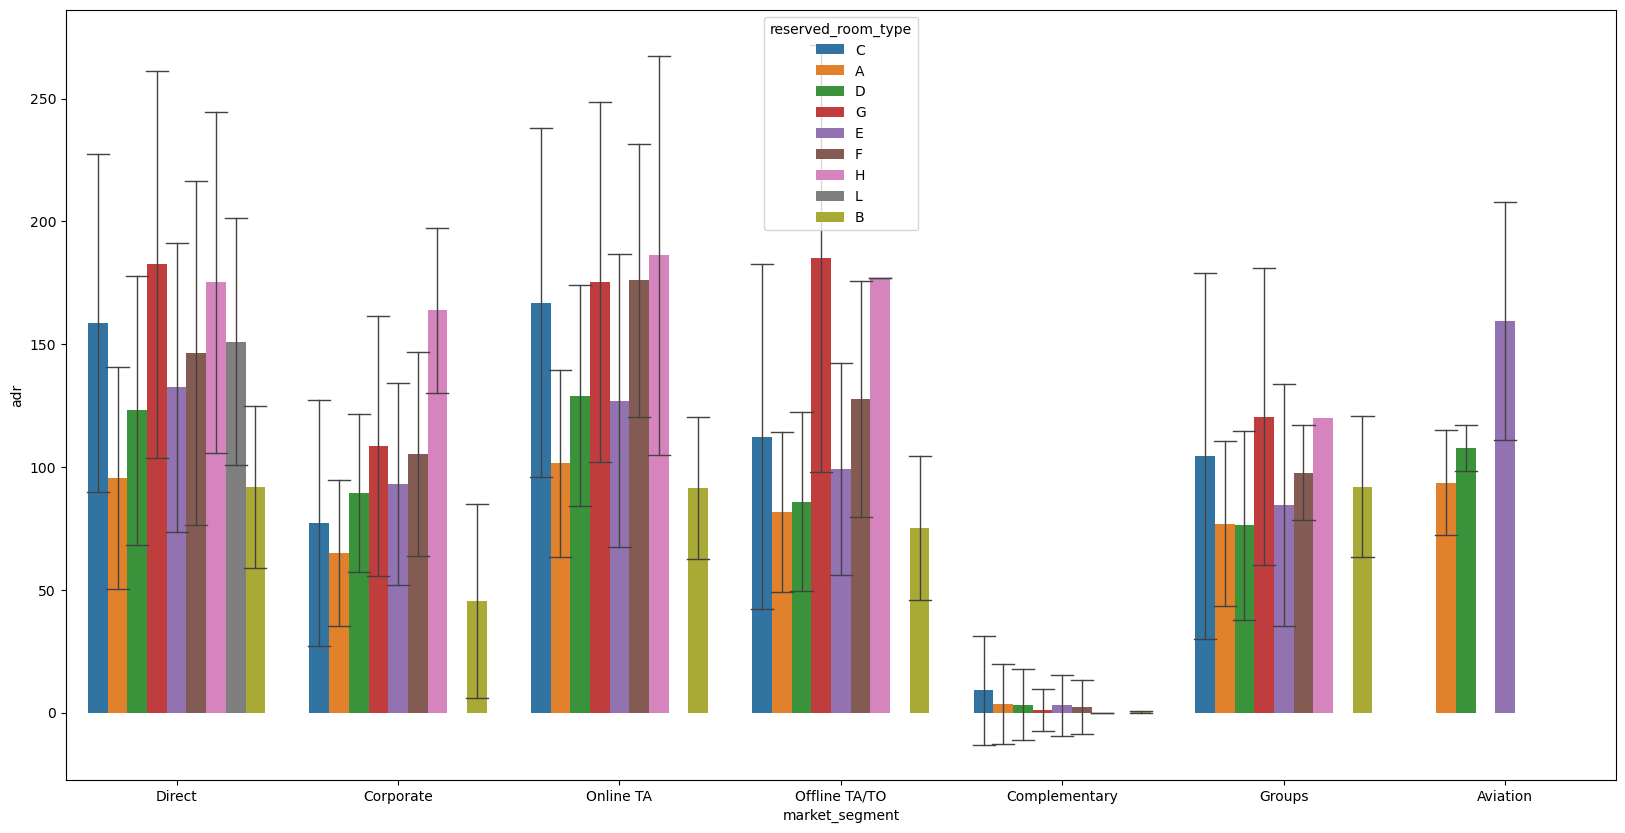

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'market_segment', y = 'adr', 
            hue = 'reserved_room_type', data = filter_hotel,
            errorbar = 'sd', 
            errwidth = 1,
            capsize = 0.1)

# Analisa 6: Meal yang disukai tamu hotel

In [ ]:
filter_hotel['meal'].unique() #disukai tamu hotel, berarti pakai data yang bookingnya not cancelled

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
#exclude Undefined

defined_meal = filter_hotel[filter_hotel['meal'] != 'Undefined']
defined_meal['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [ ]:
labels_meal = defined_meal['meal'].value_counts().index
values_meal = defined_meal['meal'].value_counts()

In [ ]:
trace_meal = go.Pie(labels = labels_meal,
               values = values_meal,
               hoverinfo = "label+percent",
               textinfo = 'value')
fig = go.Figure(data = [trace_meal])
fig.update_layout(width = 400, height = 400)
fig.show()

# Analisis 7: jumlah booking untuk masing-masing meal berdasarkan tipe hotel

In [ ]:
print('Jumlah booking untuk masing-masing meals berdasarkan tipe hotel:\n',
      defined_meal.groupby(['hotel','meal'])['meal'].count())

Jumlah booking untuk masing-masing meals berdasarkan tipe hotel:
 hotel         meal
City Hotel    BB      35570
              FB          9
              HB       3976
              SC       6529
Resort Hotel  BB      22160
              FB        311
              HB       5499
              SC         74
Name: meal, dtype: int64


# Analisis 8: booking yang memiliki special request

In [ ]:
special_request = data_hotel_clean["total_of_special_requests"].value_counts() 
#jumlah booking, berarti pakai data semuanya yang udah clean, termasuk yang cancel
special_request

total_of_special_requests
0    70201
1    33183
2    12952
3     2494
4      340
5       40
Name: count, dtype: int64

In [ ]:
data_hotel_clean.groupby(['hotel', 'total_of_special_requests'])['total_of_special_requests'].count()

hotel         total_of_special_requests
City Hotel    0                            47853
              1                            21377
              2                             8125
              3                             1584
              4                              198
              5                               26
Resort Hotel  0                            22348
              1                            11806
              2                             4827
              3                              910
              4                              142
              5                               14
Name: total_of_special_requests, dtype: int64

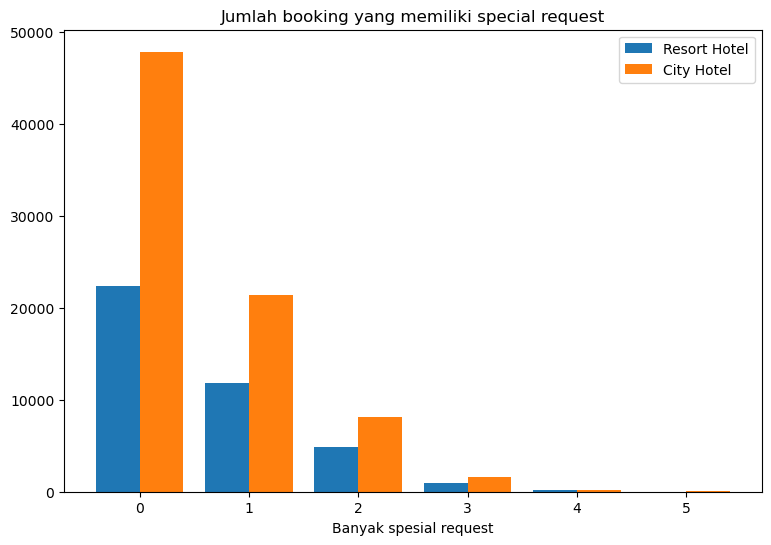

In [ ]:
data_resort = data_hotel_clean.loc[data_hotel_clean["hotel"] == 'Resort Hotel']
data_city = data_hotel_clean.loc[data_hotel_clean["hotel"] == 'City Hotel']

group_resort = data_resort["total_of_special_requests"].value_counts()
group_city= data_city["total_of_special_requests"].value_counts()

x = np.arange(len(group_resort.index))
width = 0.4

plt.figure(figsize=[9,6])
plt.bar(x - width/2, group_resort.values, width = width, label = "Resort Hotel")
plt.bar(x + width/2, group_city.values, width = width, label = "City Hotel")

plt.title('Jumlah booking yang memiliki special request')
plt.xlabel('Banyak spesial request')
plt.xticks(x, group_resort.index)  
plt.legend()
plt.show()

# Analisis 9: relasi is_canceled' dengan 'total_of_special_requests'

In [ ]:
filter_cancel = data_hotel_clean.groupby(['is_canceled', 'total_of_special_requests'])['total_of_special_requests'].value_counts().reset_index()
filter_cancel

,is_canceled,total_of_special_requests,count
0,0,0,36667
1,0,1,25867
2,0,2,10086
3,0,3,2049
4,0,4,304
5,0,5,38
6,1,0,33534
7,1,1,7316
8,1,2,2866
9,1,3,445


<Axes: xlabel='is_canceled', ylabel='count'>

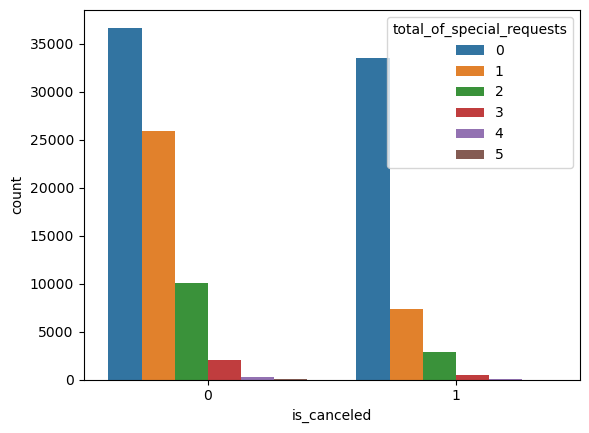

In [ ]:
sns.barplot(x = "is_canceled", y = "count", hue = "total_of_special_requests", data = filter_cancel)

# Analisis 10: jumlah tamu per bulan 

In [ ]:
filter_tamu_resort = filter_resort.groupby(['arrival_date_month'])['hotel'].count().reset_index()
filter_tamu_resort

,arrival_date_month,hotel
0,April,2550
1,August,3257
2,December,2014
3,February,2308
4,January,1866
5,July,3137
6,June,2037
7,March,2571
8,May,2535
9,November,1975


In [ ]:
filter_tamu_cityh = filter_city.groupby(['arrival_date_month'])['hotel'].count().reset_index()
filter_tamu_cityh

,arrival_date_month,hotel
0,April,4010
1,August,5367
2,December,2377
3,February,3051
4,January,2249
5,July,4770
6,June,4358
7,March,4049
8,May,4568
9,November,2676


In [ ]:
gabungan_tamu = filter_tamu_resort.merge(filter_tamu_cityh, 
                                           on = 'arrival_date_month')
gabungan_tamu.columns = ['month', 'jumlah tamu resort', 'jumlah tamu city hotel']

gabungan_tamu_sortmaxmin = gabungan_tamu.sort_values(by='jumlah tamu resort', 
                                                     ascending=False).reset_index(drop=True)
gabungan_tamu_sortmaxmin

,month,jumlah tamu resort,jumlah tamu city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
gabungan_tamu_sortmonth = sd.Sort_Dataframeby_Month(df = gabungan_tamu,
                                                  monthcolumnname='month')
gabungan_tamu_sortmonth

,month,jumlah tamu resort,jumlah tamu city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


# Analisis 11: jumlah booking tiap bulannya

In [ ]:
px.line(gabungan_tamu_sortmonth, x = 'month',
        y = ['jumlah tamu resort', 'jumlah tamu city hotel'],
        title = 'Total Jumlah Tamu Per Bulan')

# Analisis 12: persentase booking per market segment

In [ ]:
labels_market = filter_hotel['market_segment'].value_counts().index
values_market = filter_hotel['market_segment'].value_counts()

In [ ]:
trace_market = go.Pie(labels = labels_market,
               values = values_market, hoverinfo = "label+percent",
               textinfo = 'percent')
fig = go.Figure(data = [trace_market])
fig.update_layout(width = 400, height = 400)
fig.show()